In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as ks

In [3]:
data = pd.read_csv("A_Zdata.csv")
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

dataset_size = X.shape[0]

train_size = int(0.6 * dataset_size)
val_size = int(0.2 * dataset_size)

indices = np.arange(dataset_size)
np.random.shuffle(indices)

train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

X_train = X[train_indices]
y_train = y[train_indices]

X_val = X[val_indices]
y_val = y[val_indices]

X_test = X[test_indices]
y_test = y[test_indices]


In [7]:
model = ks.models.Sequential([
        ks.layers.InputLayer(input_shape= (X_train.shape[1],)),
        ks.layers.Dense(256,activation='relu'),
        ks.layers.Dense(128,activation='relu'),
        ks.layers.Dense(64,activation='relu'),
        ks.layers.Dense(26,activation='softmax')
  ])

model.compile(optimizer=ks.optimizers.Adam(learning_rate=0.001),
                #loss = 'categorical_crossentropy',
                loss = ks.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/5
6984/6984 [==============================] - 50s 7ms/step - loss: 0.6837 - accuracy: 0.8474 - val_loss: 0.2758 - val_accuracy: 0.9221
Epoch 2/5
6984/6984 [==============================] - 50s 7ms/step - loss: 0.2388 - accuracy: 0.9362 - val_loss: 0.2110 - val_accuracy: 0.9449
Epoch 3/5
6984/6984 [==============================] - 48s 7ms/step - loss: 0.1923 - accuracy: 0.9500 - val_loss: 0.2052 - val_accuracy: 0.9499
Epoch 4/5
6984/6984 [==============================] - 54s 8ms/step - loss: 0.1745 - accuracy: 0.9563 - val_loss: 0.2065 - val_accuracy: 0.9493
Epoch 5/5
6984/6984 [==============================] - 49s 7ms/step - loss: 0.1579 - accuracy: 0.9613 - val_loss: 0.1845 - val_accuracy: 0.9563
2328/2328 - 6s - loss: 0.1759 - accuracy: 0.9572 - 6s/epoch - 2ms/step

Test accuracy: 0.9571889042854309


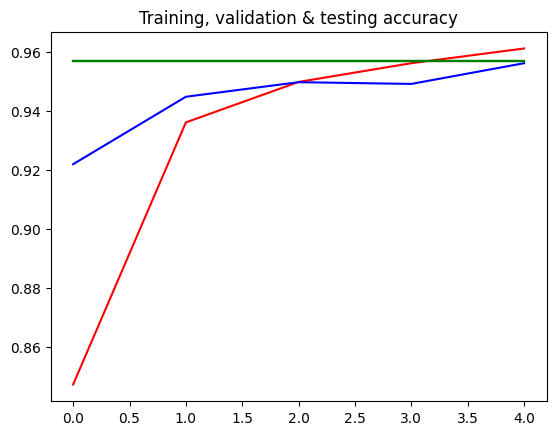

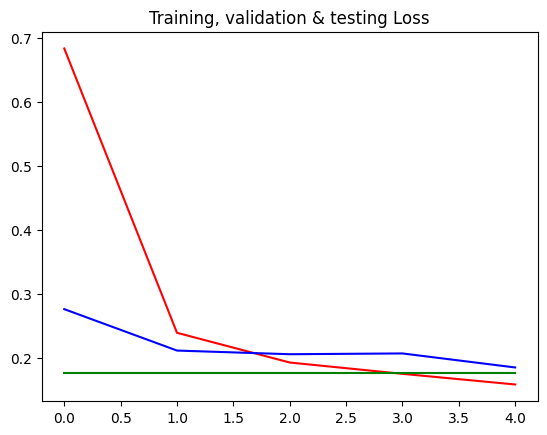

In [22]:
import pickle
with open('model_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))


plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.plot(epochs, test_acc,'g')
plt.title('Training, validation & testing accuracy')
plt.show()
print("")
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.plot(epochs, test_loss, 'g')
plt.title('Training, validation & testing Loss')
plt.show()